# Изучение данных
Импортируем библиотеки, загрузим датафрейм, посмотрим содержимое

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')#запишем содержимое в переменную data
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим, что в названиях столбцов есть большие буквы, сделаем их маленькими

In [2]:
data.columns = data.columns.str.lower()

display(data.head(5))#проверим результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим инфо о таблице

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Итог: в таблице есть пропуски. Необходимо провести предобработку данных

# Предобработка данных
В таблице есть пропуски. В столбцах name и genre по два пропуска. Возможно, это пропуски в одних и тех же столбцах. Проверим.

In [4]:
display(data[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Да, в двух строках есть пропуски. Восстановить их значения невозможно, в общем объеме данных две строки- ничтожно мало, удалим эти пропуски

In [5]:
data = data.dropna(subset=['name']).reset_index(drop=True)
display(data.info())#проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Кроеме того, есть пропуски в столбце "year_of_release"- около 300 штук, и пропуски в столбцах "critic_score", "user_score" и "rating", там их до половины от общего объема значений.
Проверим столбец с годами релиза

In [6]:
display(data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим, что пропуски есть в строках с самыми разными платформами. Для консолей, можно было бы заполнить данные медианным годом (за период, когда для платформы выходили игры), но для ПК это было бы абсолютно некорректно, игры для этой платформы выходят не одно десятилетие. В связи с этим, будет разумно также удалить такие данные из таблицы, их в общей доле тоже не очень много.

In [7]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
display(data.info())#проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Остались пропуски в оценках игр. Имеем три разных столбца, с разными типами данных, попробуем разобраться, чем они отличаются.

In [8]:
display(data['critic_score'].unique())
display(data['user_score'].unique())
display(data['rating'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Оценка критиков- целочисленное значение, по 100-бальной шкале.
Оценка пользователей- дробное число, по десятибальной шкале.
Рейтинг- тут лежат оценки, не являющиеся числами.
Оценки, с большой вероятностью, отсутствуют либо для очень старых, либо для не очень популярных игр. Попробуем это проверить.

In [9]:
display(data[data['critic_score'].isna()])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Очень похоже, что так. Есть популярные игры, но очень старые- в те времена еще не существовало систем оценивания, из которых взяты данные. Напротив, игры с современными годами выпуска, но без оценок, имеют очень низкие продажи. Видимо, их системы оценивания попросту проигнорировали.
Увы, восстановить пропуски тут невозможно. Подборка игр достаточно специфична, чтобы ни медианная, ни средняя арифметическая оценка не подошли. Рейтинг же и вовсе восстановлению не подлежит. Будем работать с тем, что есть. Заменим пропуски нулями в столбце critic_score: нулевых значений в этом столбце нет, поэтому 0 можно будет приравнять к пропуску.
В столбце user_score, есть значение tbd. Это значит to be determined- то есть, оценки пока нет, но возможно, что она появится в будущем. Для исследования, по сути, это значение можно приравнять к пропуску- восстановить "правильный" результат все равно не удастся.
Заменим типы данных в таблице.

In [10]:
data['critic_score'] = data['critic_score'].fillna(0)

Заменим типы данных в таблице.

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['year_of_release'] = data['year_of_release'].astype(int)
data['critic_score'] = data['critic_score'].astype(int)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


None

Осталось поискать дубликаты.

In [12]:
display(data.duplicated().sum())

0

Дубликатов нет. Осталось добавить столбце с общими продажами по платформам

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,NaN,NaN,0.01


Итоги:
1) Поработали с пропусками, частично удалили данные из таблицы, частично заменили.
2) Изменили типы данных
3) Изменили названия столбцов
4) Дубликатов обнаружено не было
5) Добавили столбец с суммарными продажами по всем платформам.

# Анализ данных

Посчитаем продажи игр за разные годы. Для этого проще всего использовать сводную таблицу

In [14]:
games_in_years_pivot = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
display(games_in_years_pivot)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построим гистограмму для наглядности

[Text(0.5, 0, 'год'), Text(0, 0.5, 'Количество игр')]

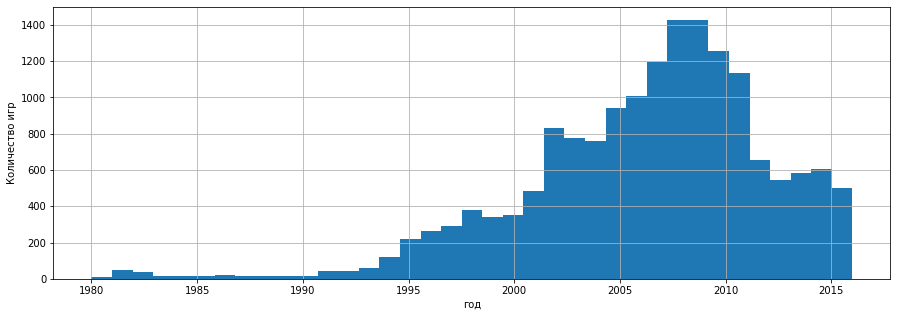

In [15]:
#для количества корзин- посчиатем количество лет, за которые есть данные
display(data['year_of_release'].hist(bins = len(data['year_of_release'].unique()), figsize=(15,5)).set(xlabel='год', ylabel='Количество игр'))

Как видим, количество игр, выходивших в разные годы, крайне неравномерно. Начиная с 1994 года, есть быстрый в рост, пик пришелся на 2005-2010 годы, затем был спад. Попробуем соотнести эти данные с продажами.

[Text(0.5, 0, 'год'), Text(0, 0.5, 'Продажи, $ млн.')]

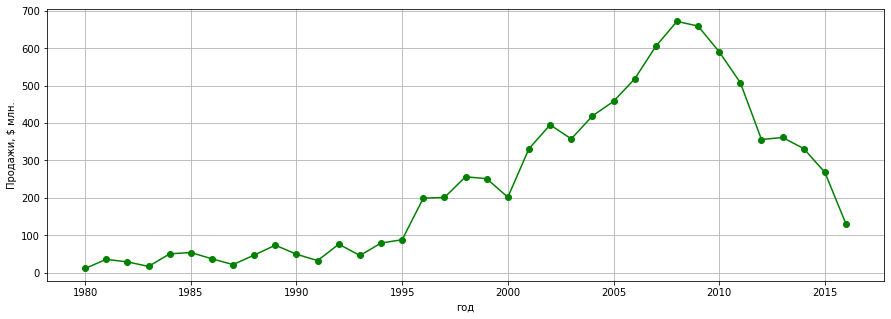

In [16]:
sales_in_year_pivot = data.pivot_table(index='year_of_release', values='total_sales', aggfunc=['sum'])
display(sales_in_year_pivot.plot(style='o-',figsize=(15,5), c='g', grid=True, legend=False).set(xlabel='год', ylabel='Продажи, $ млн.'))

Можно заметить, что по годам, график довольно похож на предыдущий- после 1995 видим быстрый рост, пик в периоде 2005-2010, и затем быстрый спад.
Посчитаем объем продаж по годам, для разных платформ.

In [17]:
sales_per_platform = data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
display(sales_per_platform)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь определим топ платформ по продажам

In [18]:
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(20)
display(top_platforms)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
Name: total_sales, dtype: float64

Не все эти платформы важны для исследования- некоторые из них уже прошли свой пик популярности, или совсем устарели.
Нужно посмотреть динамику продаж по годам. Построим график.

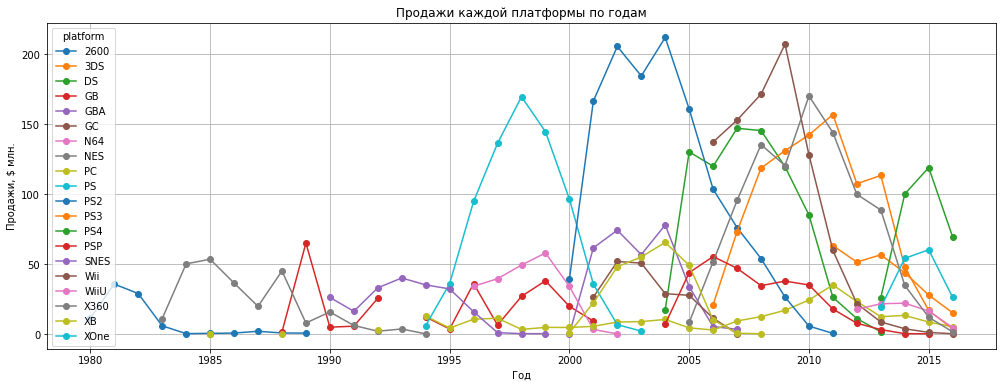

In [19]:
top_platforms_names = [i for i in top_platforms.index] #создадим список популярных платформ
top_platform_per_years = (data.query('platform == @top_platforms_names')
                           .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
                           .plot(style='o-', grid= True, legend=True, figsize=(17,6))
                           .set(xlabel='Год', ylabel='Продажи, $ млн.', title='Продажи каждой платформы по годам')
                            )

У всех популярных платформ можно выделить период набора популярности, и период спада. Динамика может отличаться, но у большинства платформ, пик популярности приходится на 4-5 год, после чего начинается спад, который также длится 4-5 лет. Итого, для 2017 года, будут актуальны платформы, вышедшие не более 5 лет назад, то есть, начиная с 2012 года (предполагаем, что в первый год спада, платформа остается достаточно популярной).

Определим характерный жизненный срок платформы.

In [21]:
platform_years = (data.query('platform == @top_platforms_names')                        
                       .pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum'))
platform_years.reset_index(inplace=True)
platform_years = platform_years.pivot_table(index='platform', values='year_of_release', aggfunc='count')
display(platform_years)
display('медианный срок жизни платформы', platform_years.median())

,year_of_release
platform,
2600,10
3DS,6
DS,11
GB,13
GBA,8
GC,7
N64,7
NES,12
PC,26


'медианный срок жизни платформы'

year_of_release    10.0
dtype: float64

In [22]:
release_after = 2012
display(release_after)

2012

В среднем, платформа живет 10 лет. Это дополняет предыдущий вывод о 5-летнем периоде набора популярности и 5-летнем спаде.
Построим график, чтобы посмотреть продажи на существующих платформах, в актуальном периоде. Последним учитываемым годом, будем считать 2015, т.к. за 2016 у нас неполные данные.

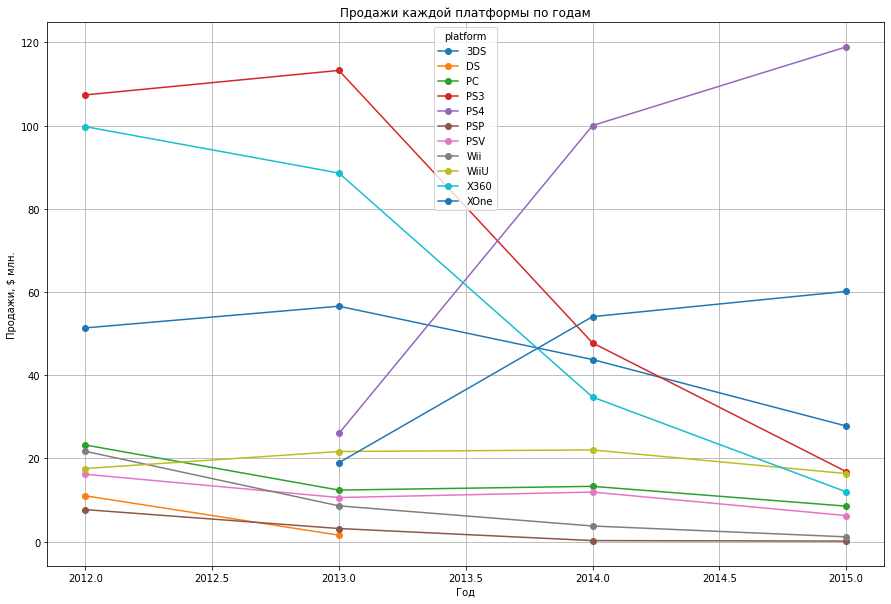

In [23]:
(data.query('year_of_release >= @release_after and year_of_release < 2016 ')
   .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
   .plot(style='o-', grid= True, legend=True, figsize=(15,10))
   .set(xlabel='Год', ylabel='Продажи, $ млн.', title='Продажи каждой платформы по годам')
);

Восходящий тренд у двух платформ- PS4 и XOne. Остальные либо держатся на одном уровне, либо падают. Посчитаем продажи по платформам в 2015 году.

In [24]:
sales_2015 = (data.query('year_of_release == 2015')
                   .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                   .sort_values(by='total_sales', ascending=False))
display(sales_2015)

,total_sales
platform,
PS4,118.90
XOne,60.14
3DS,27.78
PS3,16.82
WiiU,16.35
X360,11.96
PC,8.52
PSV,6.25
Wii,1.14


Продажи по последним двум платформам ничтожно малы, так что их можно не учитывать. Составим список платформ, которые могут быть актуальны в 2017 году.

In [25]:
actual_platform = [i for i in sales_2015[:8].index]
display('Предположительно актуальные платформы 2017 года', actual_platform)

'Предположительно актуальные платформы 2017 года'

['PS4', 'XOne', '3DS', 'PS3', 'WiiU', 'X360', 'PC', 'PSV']

Теперь построим график "Ящик с усами", по продажам игр для разных платформ. Для начала- создадим таблицу с разбивкой по продажам каждой игры на разных платформах, и подсчетом суммы проданных копий для каждой игры.

In [26]:
# сделаем выьорку- год релиза начиная с 2011, и платформа из списка.
actual_platform_sales = (data.query('year_of_release >= @release_after and platform == @actual_platform')
                     .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
                  )

actual_platform_sales['game_platforms_total'] = actual_platform_sales.sum(axis=1)
display(actual_platform_sales.sort_values(by='game_platforms_total', ascending=False))

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne,game_platforms_total
name,,,,,,,,,
Grand Theft Auto V,NaN,1.17,21.05,12.62,NaN,NaN,16.27,5.47,56.58
Call of Duty: Black Ops II,NaN,1.52,13.79,NaN,NaN,0.41,13.68,NaN,29.40
Call of Duty: Ghosts,NaN,0.69,9.36,3.83,NaN,0.35,10.24,2.92,27.39
Call of Duty: Black Ops 3,NaN,0.26,1.69,14.63,NaN,NaN,1.70,7.39,25.67
Minecraft,NaN,NaN,5.27,4.32,1.96,0.67,9.18,2.76,24.16
...,...,...,...,...,...,...,...,...,...
Pac-Man Championship Edition 2 + Arcade Game Series,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.01
Hitotsu Tobashi Renai V,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.01
"Horse Life 4: My Horse, My Friend, My Champion",0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01


Сразу видим, что самые большие продажи делают мультиплатформенные игры, при этом, количество проданных копий на разных платформах может сильно отличаться. Построим график.

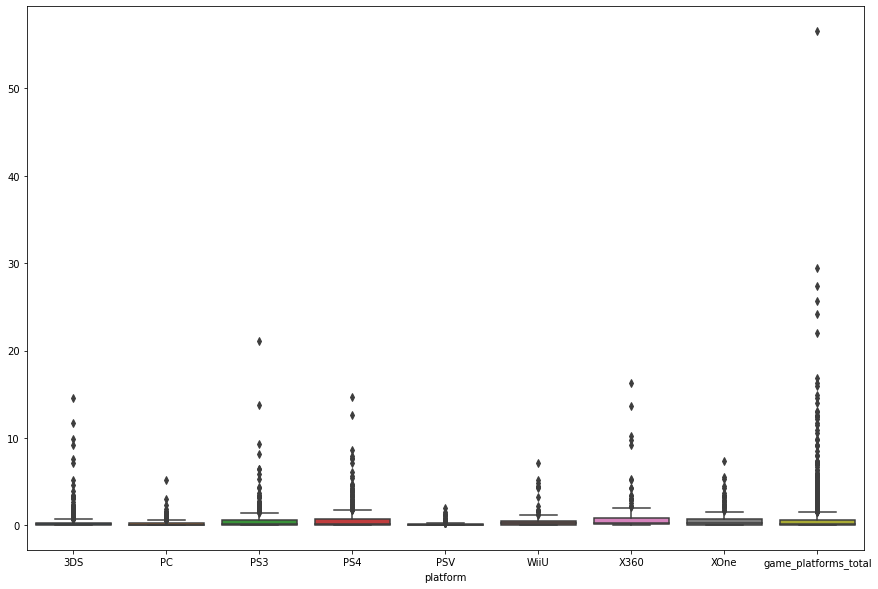

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(data=actual_platform_sales, orient='v');

Судя по графику, рекорды продаж чаще ставили игры на пралтформах PS3, PS4, X360, 3DS. 
Посмотрим подробнее данные для каждой платформы.

In [28]:
display(actual_platform_sales.describe())

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne,game_platforms_total
count,396.000000,250.00000,492.000000,392.000000,411.000000,147.000000,292.000000,247.000000,1506.000000
mean,0.491439,0.25060,0.586972,0.801378,0.119659,0.559116,0.810068,0.645020,0.921262
std,1.387161,0.49464,1.464141,1.609456,0.203011,1.058836,1.712069,1.036139,2.743623
min,0.010000,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.03000,0.050000,0.060000,0.020000,0.080000,0.100000,0.060000,0.040000
50%,0.110000,0.08000,0.200000,0.200000,0.050000,0.220000,0.310000,0.220000,0.150000
75%,0.312500,0.24000,0.610000,0.730000,0.120000,0.525000,0.870000,0.685000,0.640000
max,14.600000,5.14000,21.050000,14.630000,1.960000,7.090000,16.270000,7.390000,56.580000


Рекорд проданных копий- на PS3. Лучшая медиана и среднее арифметическое- у PS3, PS4, WiiU, X360, XOne.

Определим, как влияют на продажи отзывы критиков и игроков. Согласно заданию, нам надо посчитать корреляцию для одной популярной платформы. Попробуем определить самую популярную платформу в актуальном периоде.

In [29]:
display(data.query('year_of_release >= @release_after')
  .pivot_table(index='platform', values='total_sales', aggfunc='sum')
  .sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Поскольку у PS3 и X360 пик популярности уже явно позади, возьмем для расчетов PS4. Посмотрим корреляцию отзывов и оценок с продажами, а также построим матрицу корреляции.

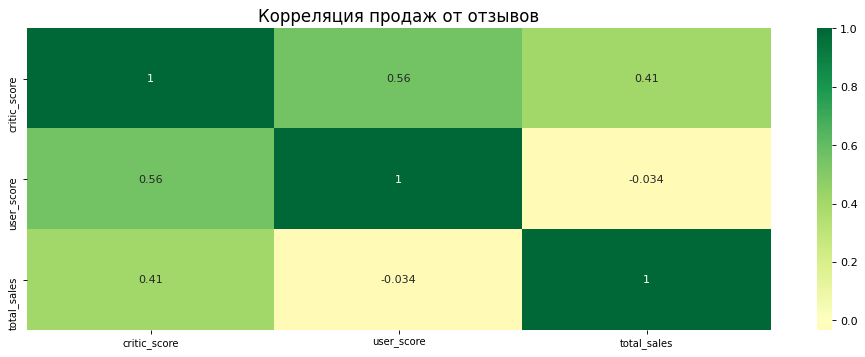

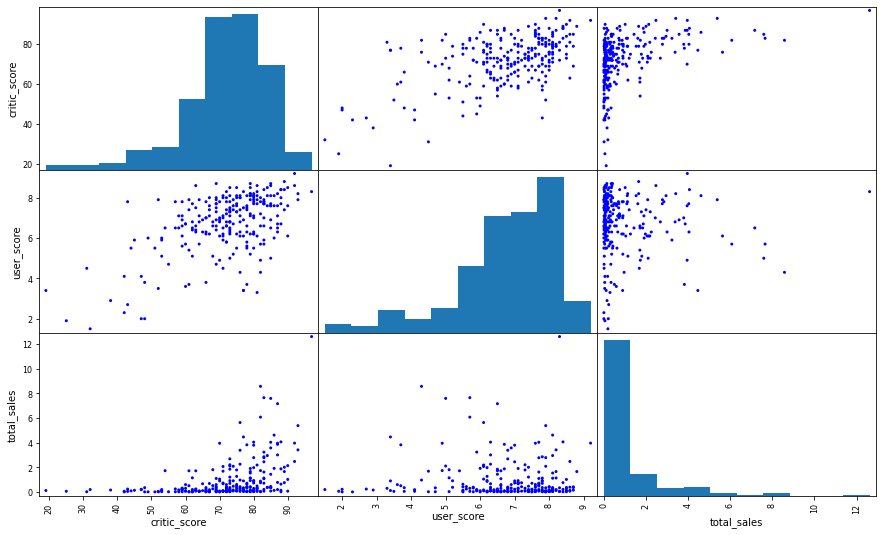

In [30]:
ps4_score_sales = (data.query('year_of_release >= @release_after & platform == "PS4" & critic_score != 0 ')
                     .loc[:, ['name', 'critic_score', 'user_score', 'total_sales']])
plt.figure(figsize=(15,5), dpi= 80)
sns.heatmap(ps4_score_sales.corr(), xticklabels=ps4_score_sales.corr().columns, yticklabels=ps4_score_sales.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляция продаж от отзывов', fontsize=15)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

pd.plotting.scatter_matrix(ps4_score_sales, figsize=(15, 9), alpha=1, c='b');

Оценка критиков и продажи, коррелируют довольно слабо. Оценки игроков и продажи, не коррелируют вовсе. Оценки игроков и критиков коррелируют средне, но они не всегда сходятся во мнении. Проверим ситуацию на остальных платформах.

Text(0.5, 1.0, 'Взаимосвязь между общими продажами и оценками')

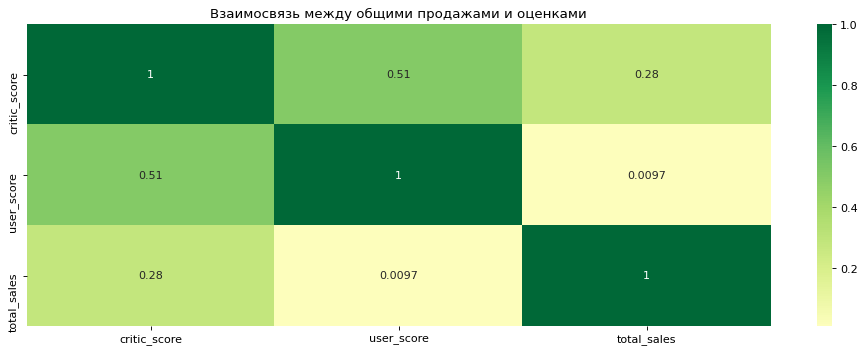

In [31]:
other_platforms = (data.query('year_of_release >= @release_after & critic_score != 0 & platform != "PS4"')
                     .loc[:, ['name', 'critic_score', 'user_score', 'total_sales']])
plt.figure(figsize=(15, 5), dpi= 80)
sns.heatmap(other_platforms.corr(), xticklabels=other_platforms.corr().columns,\
            yticklabels=other_platforms.corr().columns, cmap='RdYlGn', center=0, annot=True)
display(plt.title('Взаимосвязь между общими продажами и оценками'))

Результат немного отличается, но принципиально выводы не меняет. Определим теперь распределение игр по жанрам.

In [33]:
sales_genre = (data.query('year_of_release >= @release_after')
                    .pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'median']))
sales_genre.columns = ['Продажи, $ млн.', 'Количество игр, шт.', 'Медианные продажи, $ млн.']
sales_genre.reset_index(inplace=True)
sales_genre.sort_values(by='Медианные продажи, $ млн.', inplace=True, ascending=False)
display(sales_genre)

,genre,"Продажи, $ млн.","Количество игр, шт.","Медианные продажи, $ млн."
8,Shooter,304.73,235,0.440
10,Sports,181.07,268,0.240
4,Platform,61.00,85,0.210
7,Role-Playing,192.80,370,0.140
6,Racing,53.50,115,0.140
2,Fighting,44.49,109,0.130
0,Action,441.12,1031,0.120
3,Misc,85.04,192,0.120
9,Simulation,35.12,80,0.120
11,Strategy,13.34,71,0.080


Разные жанры оличаются не только продажами, но и количеством игр этих жанров.
Самый популярный жанр- Action. Самый непопулярный- Puzzle.

Выводы по исследованию данных:
1) Срок жизни платформы- около 10 лет.
2) Самая популярная из актуальных платформ- PS4. Также в восходящем тренде- XOne.
3) Потенциально прибыльные платформы PS4, XOne, 3DS, PS3, WiiU, X360, PC, PSV
4) Отзывы игроков, судя по всему, не влияют на продажи. Отзывы критиков имеют небольшой вес.
5) Самые популярные жанры- Action, Shooter, Role-Playing, Sports.

# Портреты пользователей разных регионов

Согласно заданию- нам надо произвести одинаковые расчеты для трех разных регионов. Следовательно, мы можем создать функцию, которая сделает нам все необходимые расчеты, и вызвать ее для каждого из регионов.

In [34]:
def top_5(data, column):
    #сгруппируем данные по топ-5 самых популярных платформ
    top_5_platforms = data.groupby('platform')[column].sum().sort_values(ascending=False).head()
    #выведем график
    display(top_5_platforms.plot(autopct='%1.1f%%', kind='pie', title='Доля продаж по платформам', legend=False, figsize=(7, 7)).set(ylabel=''))
    #создадим сводную таблицу с данными по соотношению рейтинга игры и продаж        
    sales_per_rating = data.pivot_table(index='rating', values=column, aggfunc=['sum', 'count'])
    sales_per_rating.columns = ['Продажи, $ млн.', 'Количество игр, шт.']
    sales_per_rating.reset_index(inplace=True)
    sales_per_rating.sort_values(by='Продажи, $ млн.', inplace=True)
    #выведем график
    x = sales_per_rating['rating']
    y1 = sales_per_rating['Продажи, $ млн.']
    y2 = sales_per_rating['Количество игр, шт.']

    fig, ax1 = plt.subplots(1,1,figsize=(15,5), dpi= 80)
    ax1.plot(x, y1, color='tab:red')

    ax2 = ax1.twinx()
    ax2.plot(x, y2, color='tab:blue')
#выведем график о продажах
    ax1.set_xlabel('Рейтинг ESRB', fontsize=20)
    ax1.tick_params(axis='x', rotation=0, labelsize=12)
    ax1.set_ylabel('Продажи, $ млн.', color='tab:red', fontsize=20)
    ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
    ax1.grid(alpha=.4)
#выведем график о количестве игр
    ax2.set_ylabel('Количество игр, шт.', color='tab:blue', fontsize=20)
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_title('Влияние рейтинга ESRB на продажи', fontsize=22)

    plt.show()
    
    top_5_genres = data.groupby('genre')[column].sum().sort_values(ascending=False).head()
    
    top_5_genres.plot(autopct='%1.1f%%', kind='pie', title='Доля продаж по жанрам', legend=False, figsize=(7, 7)).set(ylabel='')
    return


Теперь по очереди применим функцию к выборкам данных по разным регионам. Начнем с NA:

[Text(0, 0.5, '')]

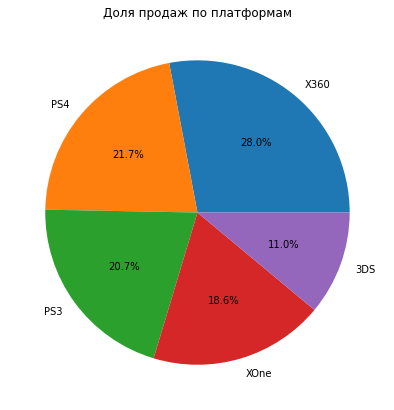

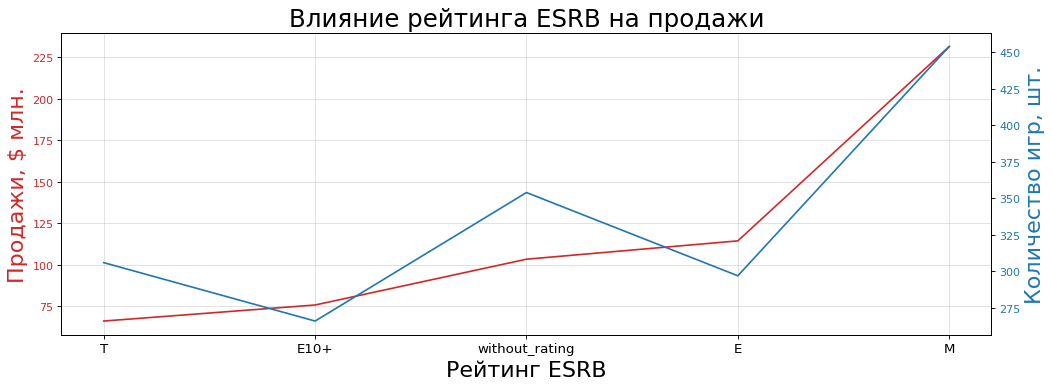

None

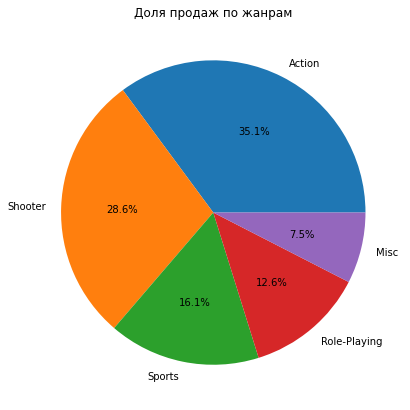

In [35]:
region_na = (data.query('year_of_release >= @release_after & na_sales != 0 ').loc[:, ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'rating']])
region_na['rating'] = region_na['rating'].fillna('without_rating')
display(top_5(region_na, 'na_sales'))

1) Ключевая платформа- X360
2) Ключевые жанры- Action и Shooter
3) Самый высокий по продажам рейтинг- M

Повторим для региона EU:

[Text(0, 0.5, '')]

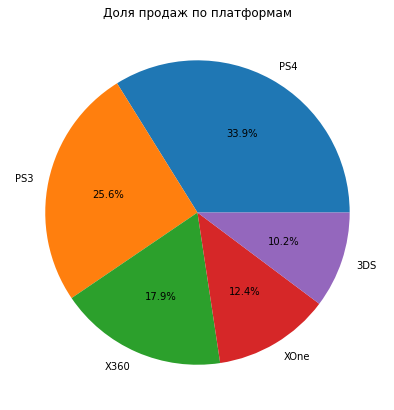

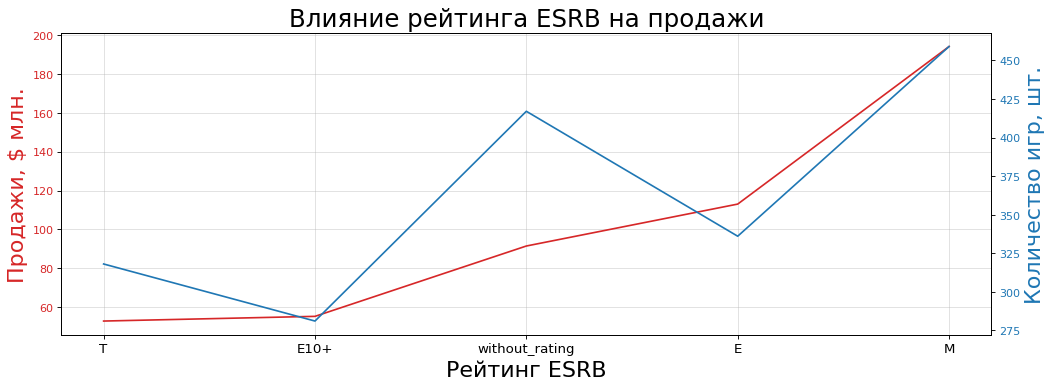

None

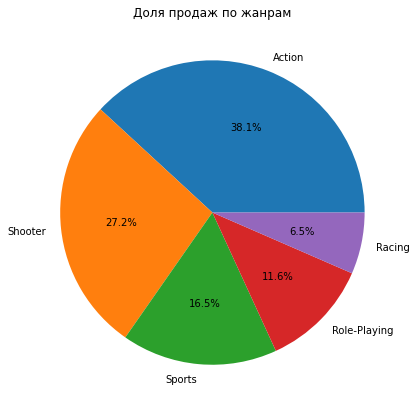

In [36]:
region_eu = (data.query('year_of_release >= @release_after & eu_sales != 0 ').loc[:, ['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'rating']])
region_eu['rating'] = region_eu['rating'].fillna('without_rating')
display(top_5(region_eu, 'eu_sales'))

1) Ключевые платформы- PS3 и PS4
2) Ключевой жанр- Action и Shooter
3) Самые высокие продажи у игр с рейтингом M

Повторим для региона JP

[Text(0, 0.5, '')]

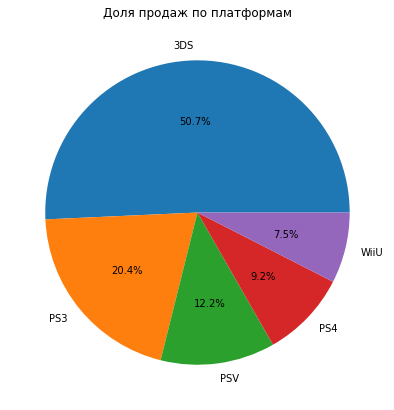

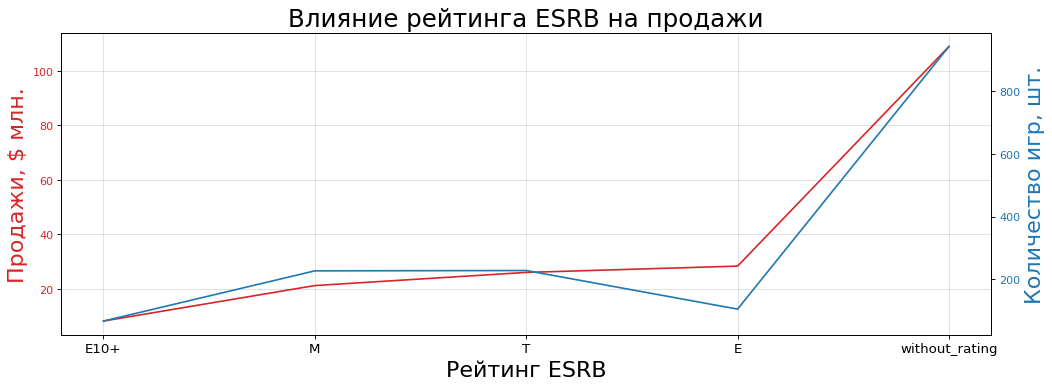

None

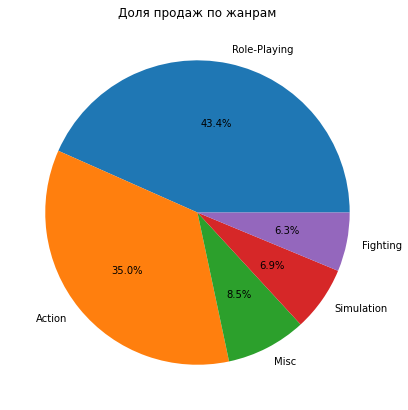

In [37]:
region_jp = (data.query('year_of_release >= @release_after & jp_sales != 0 ').loc[:, ['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'rating']])
region_jp['rating'] = region_jp['rating'].fillna('without_rating')
display(top_5(region_jp, 'jp_sales'))

1) Ключевая платформа- 3DS
2) Ключевые жанры- Role-Playing и Action
3) По количеству игр самый популярный рейтинг- M и T, по продажам- E

Выводы:

1) Жанр Action популярен во всех регионах. В EU и NA также популярен Shooter, однако в Японии ситуация совсем другая, там RPG и Action захватили почти 80% рынка.

2) Во всех регионах популярностью пользуются разные платформы. В Японии вырывается вперед 3DS, малопопулярный в других регионах.

3) В EU и NA популярны игры со взрослым рейтингом M. В Японии более популярен детский рейтинг E.

# Проверка гипотез

Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу: средние рейтинги игр на двух платформах равны. Альтернативная гипотеза: средние рейтинги игр на двух платформах различаются. Проверим гипотезу:

In [38]:
xone_user_rating = data.query('year_of_release >= 2011 and platform == "XOne"')['user_score'].dropna()
pc_user_rating = data.query('year_of_release >= 2011 and platform == "PC"')['user_score'].dropna()

alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xone_user_rating, pc_user_rating, equal_var = True)

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

0.6267602271422398

'Не получилось отвергнуть нулевую гипотезу'

Не получилось отвергнуть нулевую гипотезу, что говорит в пользу утверждения: средние пользовательские рейтинги игр на PC и XOne равны.

Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую гипотезу: средние рейтинги игр двух жанров равны. Алтернативная гипотеза: средние рейтинги игр двух жанорв различаются.

In [39]:
action_user_rating = data.query('year_of_release >= 2011 and genre == "Action"')['user_score'].dropna()
sports_user_rating = data.query('year_of_release >= 2011 and genre == "Sports"')['user_score'].dropna()
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(action_user_rating, sports_user_rating, equal_var = True)

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

5.1974550252152054e-24

'Отвергаем нулевую гипотезу'

Нулевая гипотеза отвергнута, что говорит в пользу утверждения: средние пользовательские рейтинги жанров Action и Sports- разные.

Вывод:
1) Первая гипотеза, насколько мы можем судить, верна: на разных платформах рейтинги схожи.
2) Вторая гипотеза также верна: рейтинги отличаются.

# Выводы

1) Платформа достигает пика популярности на 4-5 год жизни. Спад происходит не сразу, поэтому платформу можно считать актуальной и на 6-й год жизни.

2) Есть только две платформы, набирающие популярность- PS4 и XOne, причем PS4 заметно популярнее.

3) Потенциально прибыльные платформы PS4, XOne, 3DS, PS3, WiiU, X360, PC, PSV

4) Отзывы критиков немного влияют на продажи. Отзывы игроков на продажи не влияют.

5) Самые высокие продажи в жанрах Action, Shooter, Role-Playing, Sports, низкие в Pazzle, Strategy, Adventure, Simulation

6) Различия между разными регионами очень значительны. Различаются и предпочтения по платформам, и предпочтения по жанрам, и возраст аудитории.

7) Лучше всего выпускать мультиплатформенные игры. Однако, можно предположить, что есть исключения. Например, в Японии крайне популярна платформа 3DS. Следовательно, выпуская игру жанра RPG, с детским рейтингом, что имеет сильно меньшую популярность в других регионах, мы можем ограничиться только этой одной платформой.

8) Проверка гипотез показала, что они скорее всего, верны.